# Introduction. Project description.
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.
You should:
Learn to predict the probability of churn (for the upcoming month) for each customer
Draw up typical user portraits: select the most outstanding groups and describe their main features
Analyze the factors that impact churn most
Draw basic conclusions and develop recommendations on how to improve customer service:
Identify target groups
Suggest measures to cut churn
Describe any other patterns you see with respect to interaction with customers

# Step 1. 
## Initialization


In [1]:
%pip install sidetable

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from scipy import stats as st
import math as mth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

## Download the data

In [3]:
try:
    data = pd.read_csv('gym_churn_us.csv')
except:
    data = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


The dataset includes the following fields:
- 'Churn' — the fact of churn for the month in question
- Current dataset fields (User data for the preceding month):
    - 'gender'
    - 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
    - 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
    - Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
    - 'Phone' — whether the user provided their phone number
    - 'Age'
    - 'Lifetime' — the time (in months) since the customer first came to the gym
- Data from the log of visits and purchases and data on current membership status
    - 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
    - 'Month_to_end_contract' — the months remaining until the contract expires
    - 'Group_visits' — whether the user takes part in group sessions
    - 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
    - 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
    - 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

Column names or feature names are inconsistent, so let's make them all lower case.

In [5]:
data.columns=data.columns.str.lower()
data

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


# Step 2. Carry out exploratory data analysis (EDA)
## Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).


In [6]:
data.stb.missing(style=True)

,missing,total,percent
gender,0,"4,000",0.00%
near_location,0,"4,000",0.00%
partner,0,"4,000",0.00%
promo_friends,0,"4,000",0.00%
phone,0,"4,000",0.00%
contract_period,0,"4,000",0.00%
group_visits,0,"4,000",0.00%
age,0,"4,000",0.00%
avg_additional_charges_total,0,"4,000",0.00%
month_to_end_contract,0,"4,000",0.00%


No missing values - excellent! 7 out of 14 columns have only values 0 or 1, so they are boolean. The other columns are really quantitative with numerical values. Let's have a look at the mean, max and min values.


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


We see that for 7 boolean features min = 0 and max = 1. 

Other parameters differ a lot.

- Client's age varies from 18 to 41 years old. 

- Some parameters are given in months:
    - contract_period and month_to_end_contract are comparable - 1-6-12 months / from 1 to 12 months,
    - lifetime varies from 0(new comers) to 31 months.
- avg_additional_charges_total given in $: 0.15 - 552.6
- avg_class_frequency_total and avg_class_frequency_current_month are similar, with ranges 0 - 6 and 0 - 6.15 times per month.

There are no negative or wierd values.


In [8]:
data.contract_period.value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

## Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).


We can group values by churn and compare thr mean values for parameters.

In [9]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


We see that gender, phone are almost equal for both group. Some parameters a little bit greater (near_location, age...), and others are 2-3 times greater (promo_friends, contract_period, month_to_end_contract...) for those who stayed than for those who churned. Let's compare the distribution of the features by group.


## Plot bar histograms and feature distributions for those who left (churn) and those who stayed.


In [10]:
data.churn.value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Number of users who left is almost 3 times smaller, and this fact wouldn't affect histograms' shape, but we'll need to pay special attention to the range of values on both axes.

Let's define a function for plotting histograms for churned and non-churned customers.

In [11]:
def plot_feature_distributions(df, feature):
    plt.figure(figsize=(12, 6))
    
    # Plot histogram for churned customers
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['churn'] == 0], x=feature, kde=True)
    plt.title(f'Distribution of {feature} for Non-Churned Customers')
    
    # Plot histogram for non-churned customers
    plt.subplot(1, 2, 2)
    sns.histplot(df[df['churn'] == 1], x=feature, kde=True)
    plt.title(f'Distribution of {feature} for Churned Customers')
    
    plt.tight_layout()
    plt.show()



We exclude 'churn' column from the data  and plot histograms for all the features.

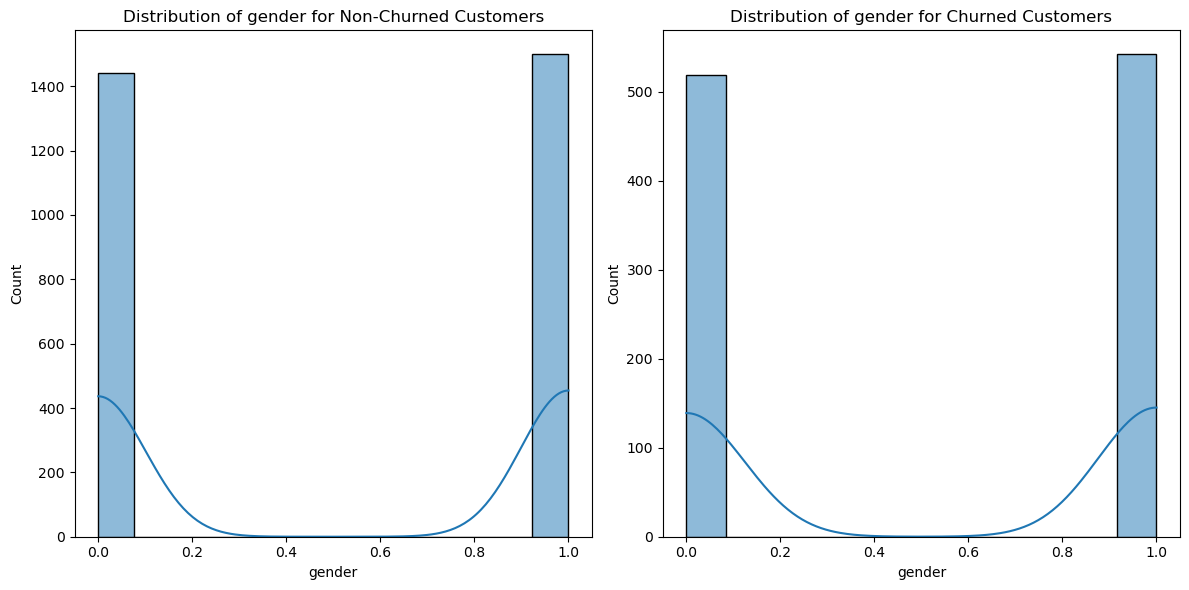

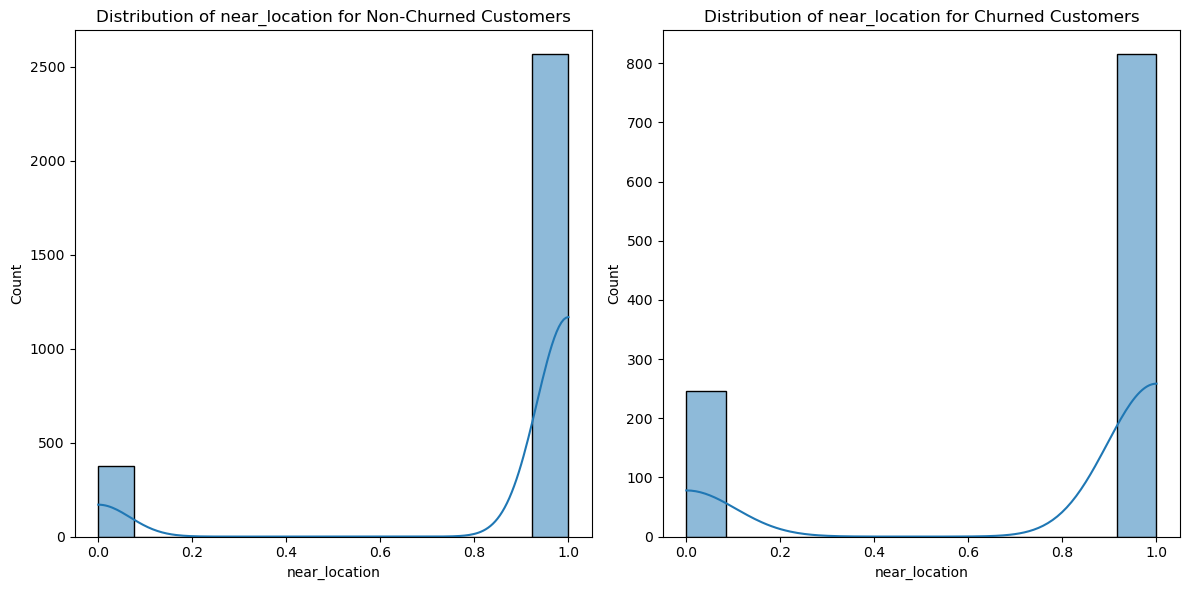

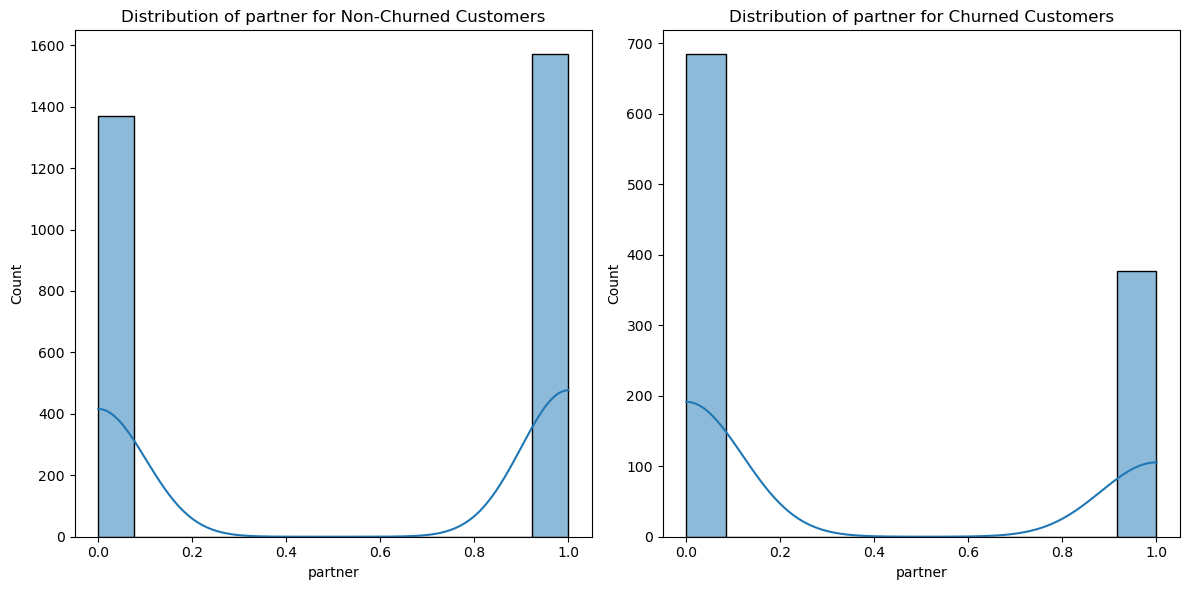

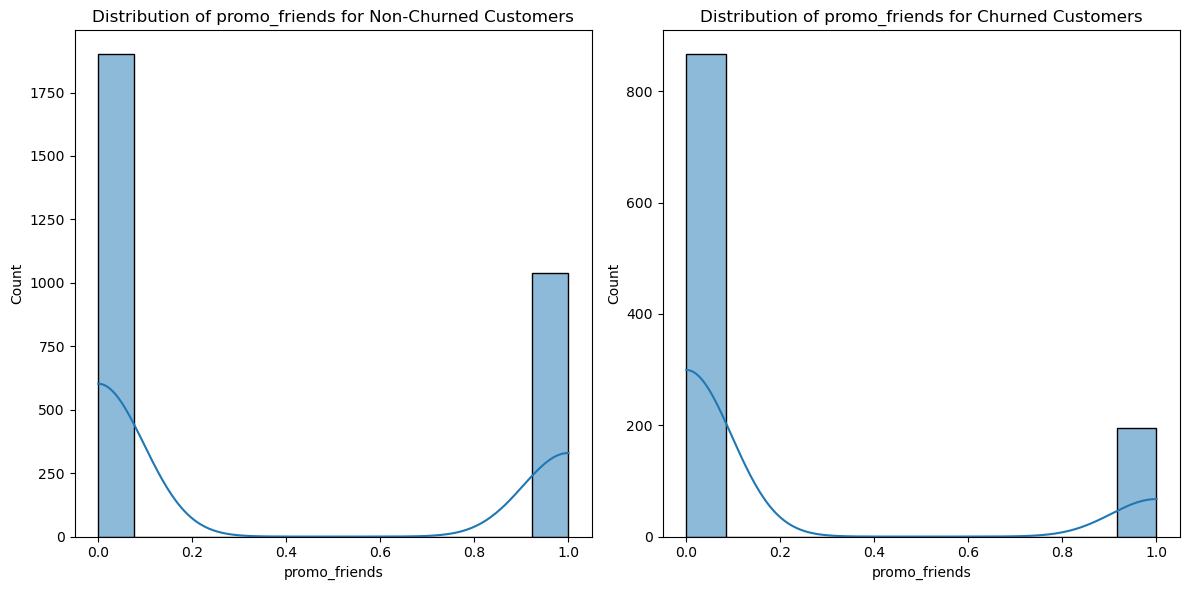

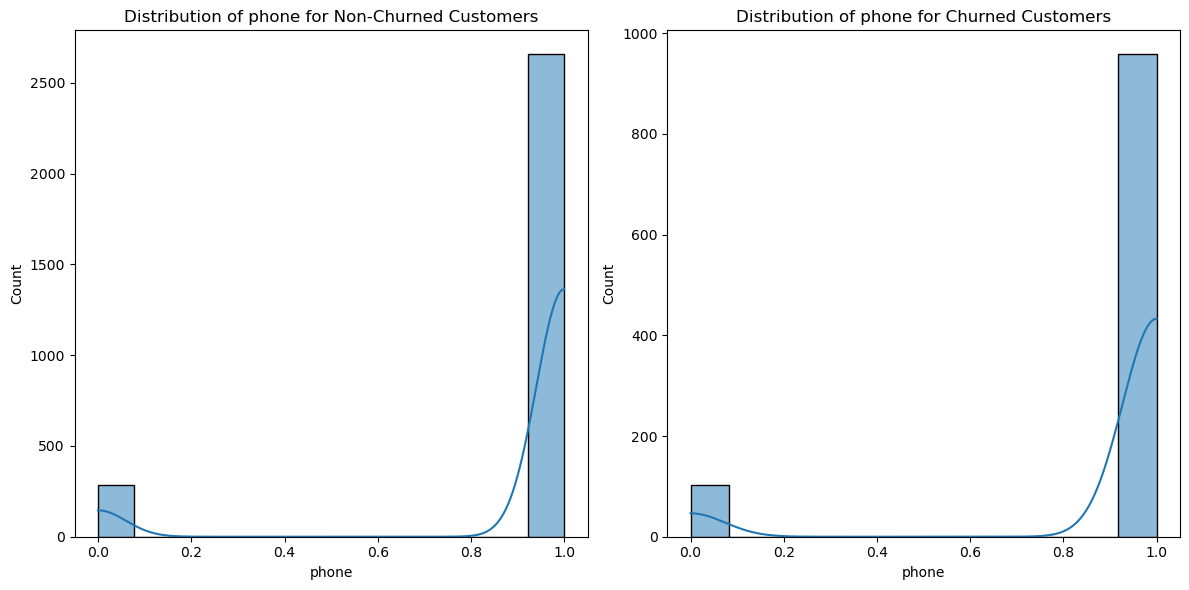

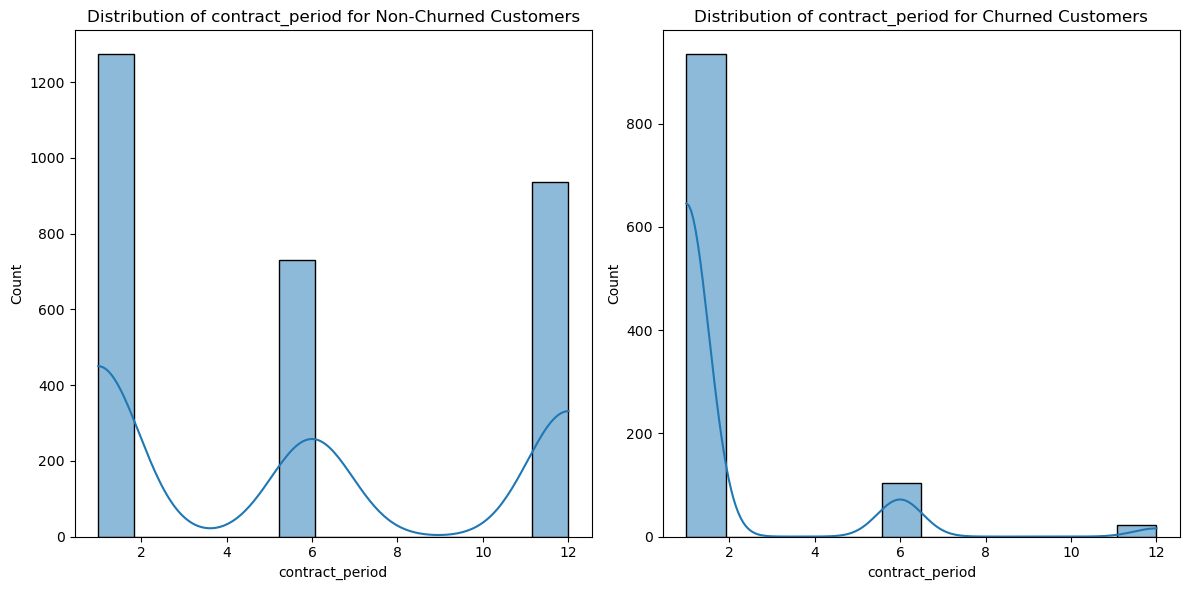

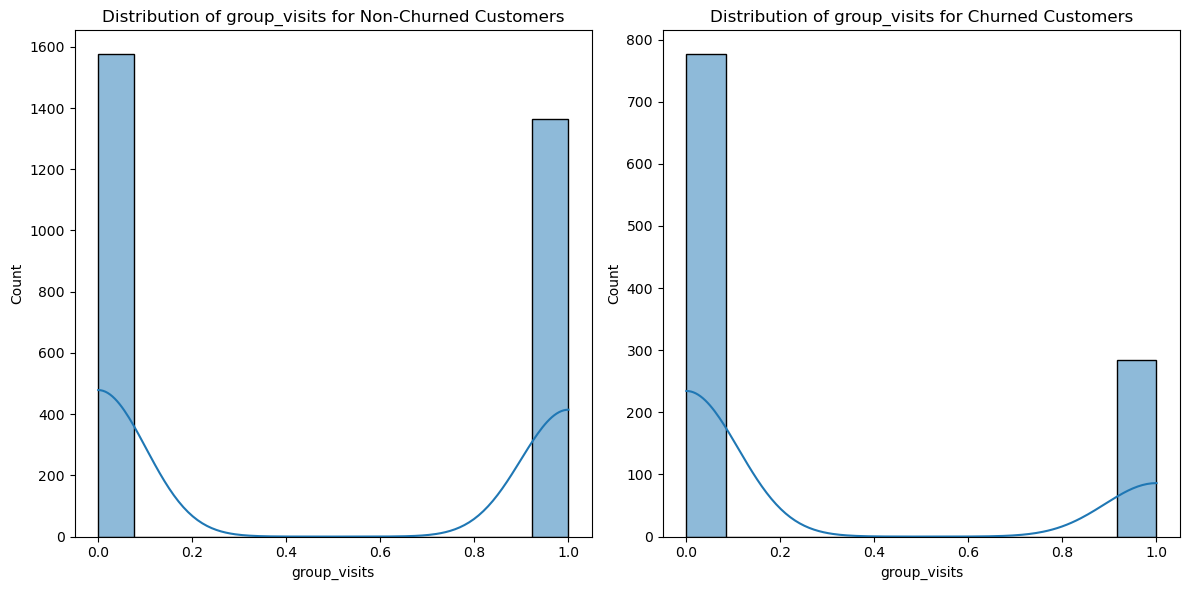

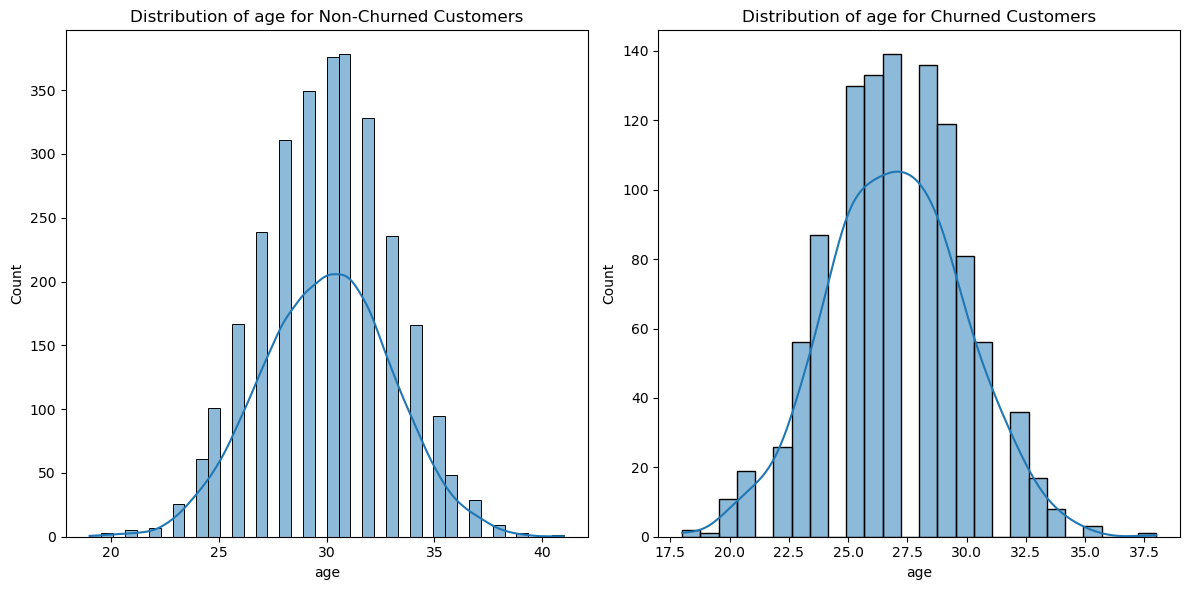

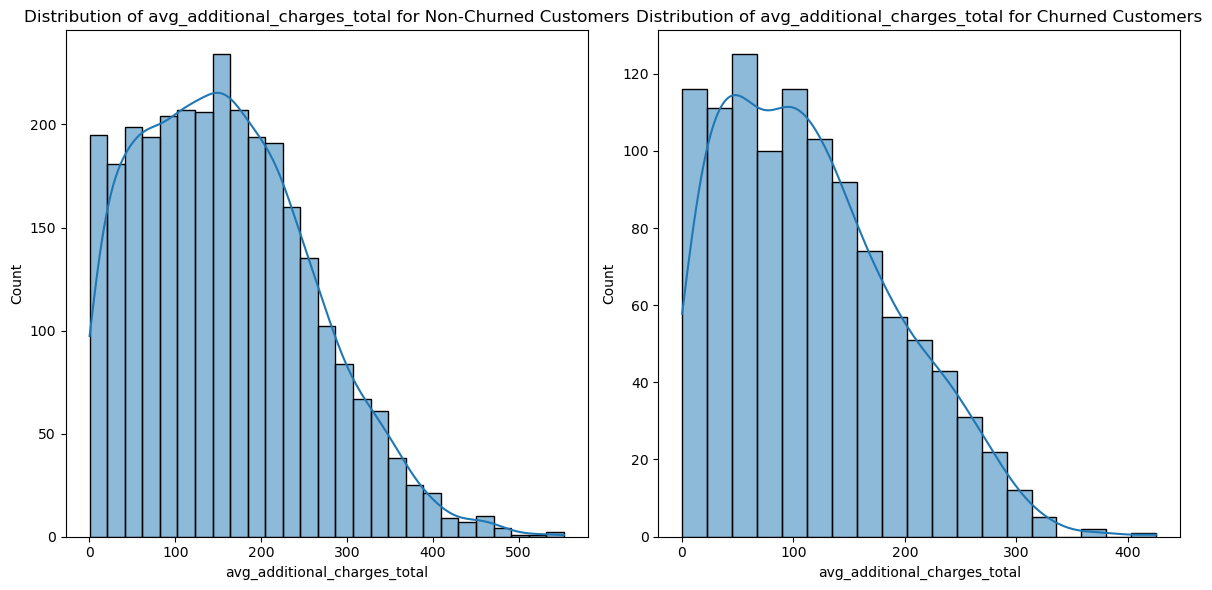

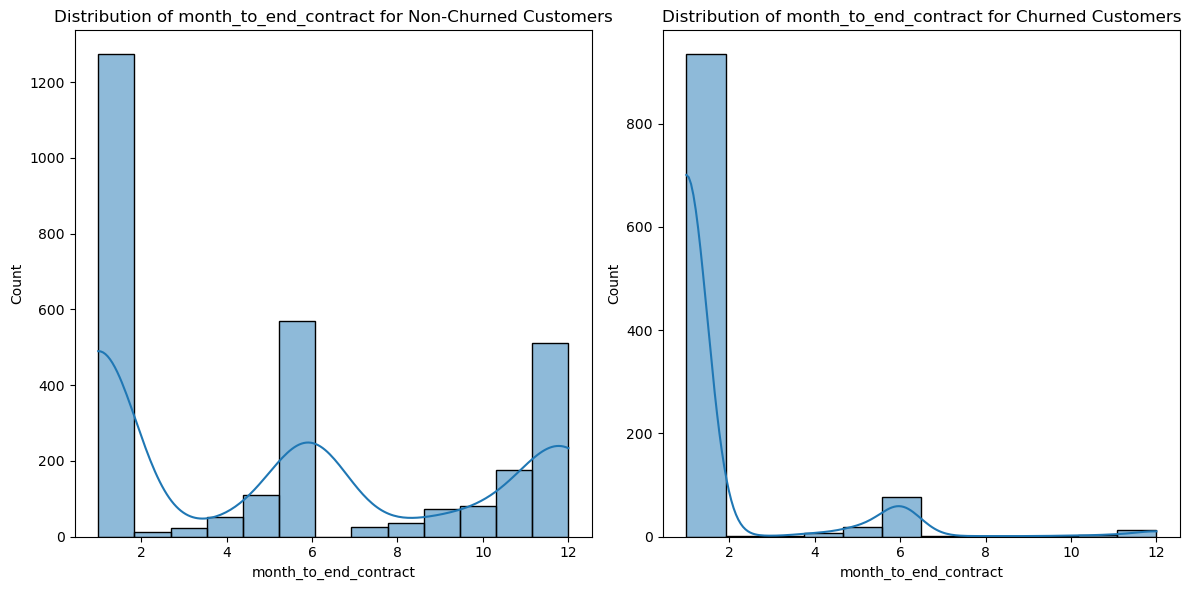

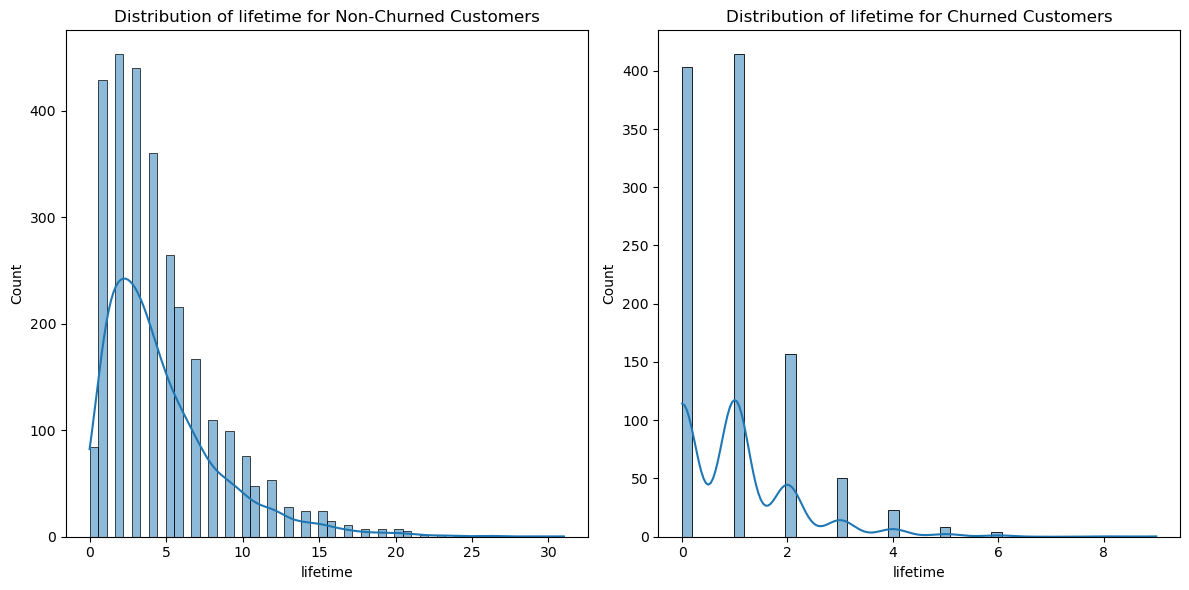

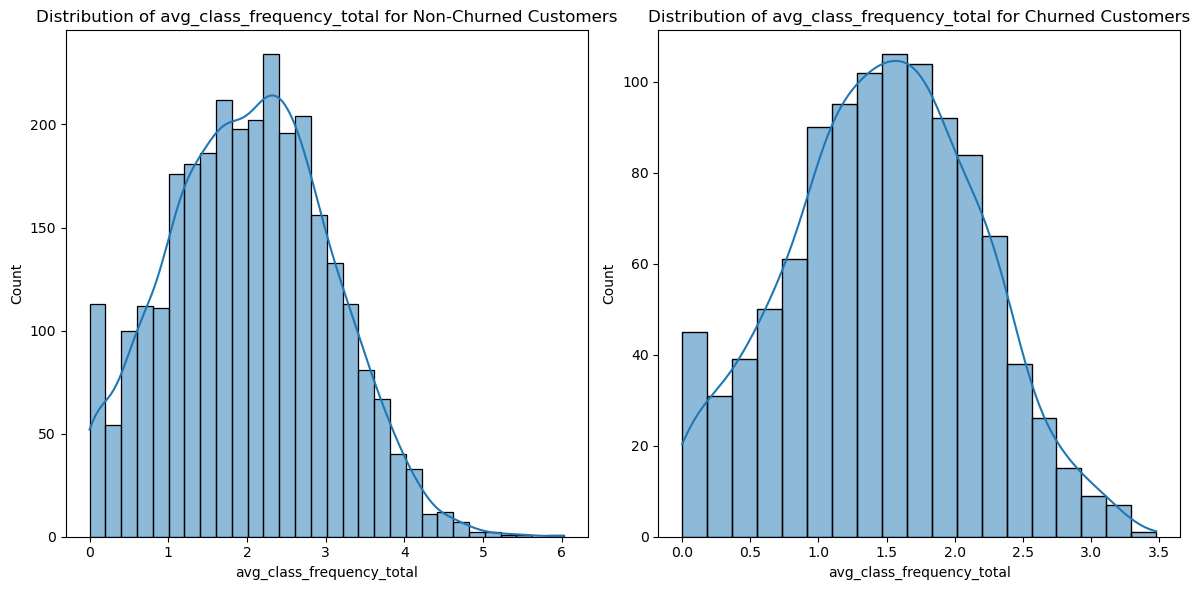

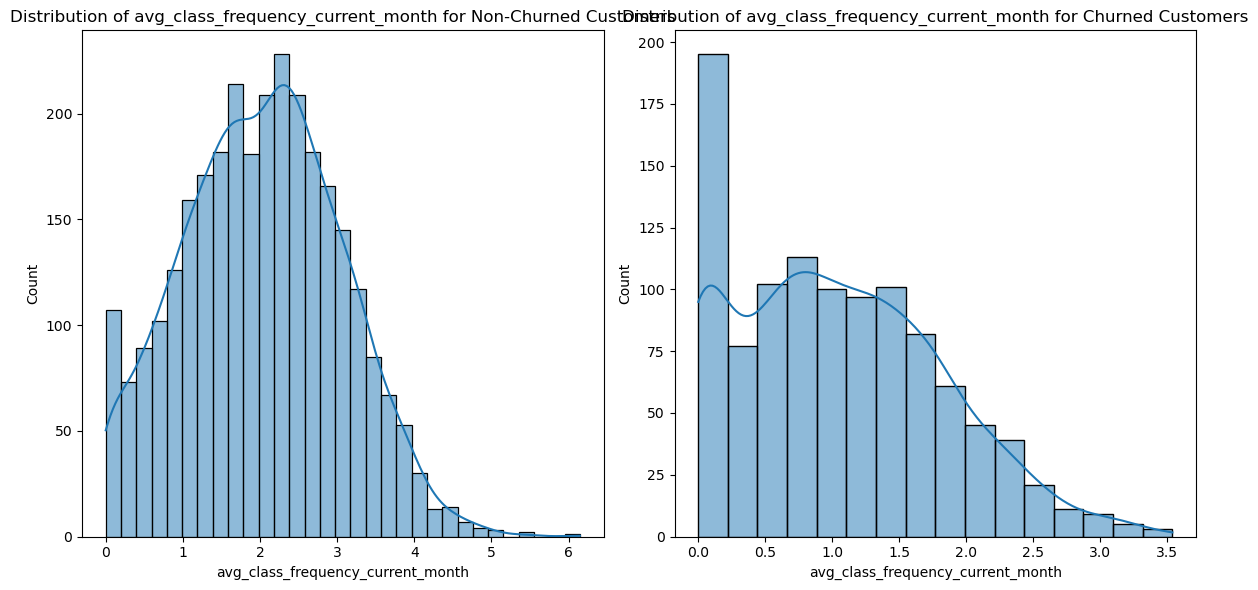

In [12]:
features = data.columns.drop('churn') 
for feature in features:
    plot_feature_distributions(data, feature)

As we expected, pictures for 'gender' and  'phone' are very similar for both groups, so these parameters definitely don't influence churn. Other boolean parameters have a difference in distribution:
- 'near_location': the majority of customers in both groups live near location, but among those who churn the share of customers living far from location is greater.
- 'promo_friends' and 'group_visits': the majority of customers in both groups did not come with friend's promo code and do not particpate in group visits, but but among those who churn the share of customers having promo from friends  and taking part in group visits is smaller.
- 'partner': the majority of customers who stay are employeers of a partner company, while the majority of those who churned not. The distribution of this feature is  just the opposite. 

Non-boolean parameters:
- 'Contract_period', 'Month_to_end_contract', 'Lifetime': the distribution in the plots differs a lot, customers who churned most often have just 1 month contract and 1 month until until the contract expires, lifetime values vary up to 9 for churned customers and up to 31 for non-churned.
- 'Age', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total': the distributions of all these features have very similar shape, but values differ. The mean and max age for churned customers are smaller, they apend less on additional services and visit gym less often over the lifetime and  over the preceding month.

## Build a correlation matrix and display it.

In [13]:
corr_m=data.corr()
corr_m

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Let's plot a heatmap to visualise relationship between the features.

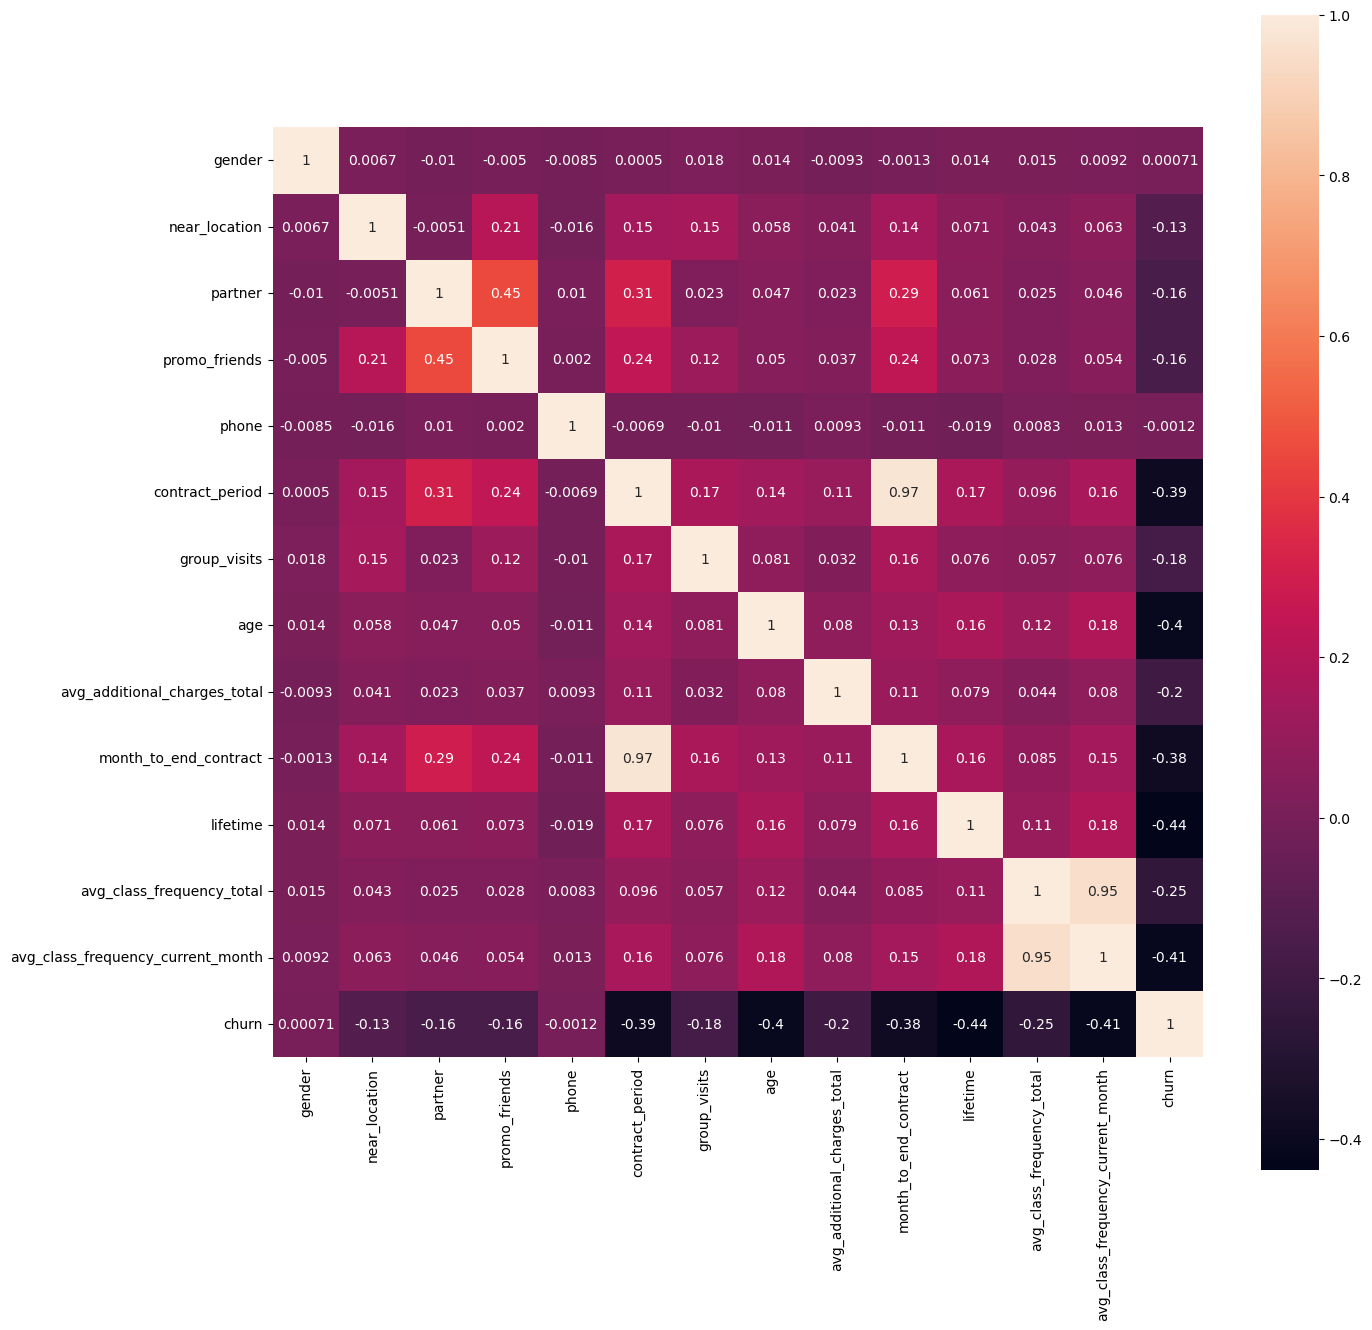

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square=True,annot=True)
plt.show()

Some parameters are highly correlated: 'month_to_end_contract' & 'contract_period'(0.97), 'avg_class_frequency_current_month' & 'avg_class_frequency_total'(0.95). The first two features have similar correlation coefficisnts with 'churn' parameter:  -0.38, -0.39. In the second pair 'avg_class_frequency_current_month' is more correlated with 'churn'(-0.41), than 'avg_class_frequency_total'(-0.25), so the last parameter is less important for our analysis.
'promo_friends' & 'partner' have significant positive correlation (0.45), since customers may work for the same partner company and be friends.

Our target variable 'churn' has significant negative correlation with 'lifetime' (-0.44), 'avg_class_frequency_current_month' (-0.41), age(-0.4), contract_period (-0.39), 'month_to_end_contract' (-0.38). Since the last two features are highly correlated, the model could include just 1 of them.

# Step 3. Build a model to predict user churn



## Build a binary classification model for customers where the target feature is the user's leaving next month.

Predicting user churn with our data is an example of supervised learning: model is given a large number of observations(customers) as input, where for each customer its feature values (X) and the target variable value (y) -  'churn' - are known(data). Since we have only two options for 'churn', it's a binary variable, so we'll build a binary classification model.

In [15]:
X = data.drop('churn', axis=1)
y = data['churn']

## Divide the data into train and validation sets using the train_test_split() function.


Let's tke 80% of data as a train set and 20 % as a validation set.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

## Train the model on the train set with two methods: logistic regression and random forest. 

We'll use LogisticRegression(), RandomForestClassifier() models from sklearn library. 

First we create the model variable and train the model on the train set. 

In [17]:
# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
# define the algorithm for the RandomForest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

Than the model will make a binary prediction for the objects from the validation set with predict() method and store it  in predictions. Predict_proba() method will
estimate the probability that an object from the validation set belongs to class "1" (that is, 'churn') and store it in probabilities.

The logics for LogisticRegression() and RandomForestClassifier() is the same, we'll show it below.

## Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

Bynary classification models are characterized by classification metrics: accuracy, precision and recall.
These parameters are based on relations between True Positive(TP), False Positive(FP), True Negative(TN), False Negative(FN) predictions.
**Accuracy** is the share of accurate predictions among all predictions: (TP+TN)/n. 

**Precision** is the share of correct answers among all predicted positive cases: TP/(TP+FP)

**Recall** explains how many of the actual positive cases we were able to predict correctly with our model: TP/(TP+FN)

Accuracy , precision and recall metrics are generated by the functions accuracy_score, precision_score and recall_score in the metrics module. Each metric takes values from 0 to 1. The closer to 1, the better.

Let's define a function for classification metrics.

In [18]:
def print_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

We will use this function with both binary classification models. 
First let's try to implement logistic regression model to the raw data(non-standardized).

In [19]:
# define the algorithm for the logistic regression model
lr_model_ = LogisticRegression(random_state=0)
lr_model_.fit(X_train, y_train)
# use the trained model to make predictions
lr_predictions_ = lr_model_.predict(X_test)
lr_probabilities_ = lr_model_.predict_proba(X_test)[:,1]
# print all metrics
print_metrics(y_test, lr_predictions_, lr_probabilities_, title='Metrics for logistic regression: raw values')

Metrics for logistic regression: raw values
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.80


C:\Users\vladimir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



The metrics are calculated, but we get a warning, so the data really need standardization. Let's now standardize data with StandardScaler  and get new train and validation sets of values. 

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Now we can try the model again with standardized data.

In [21]:
# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
# train the model on standardized train set
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


With standardized data we get better metrics. Now let's inplement RandomForestClassifier with standardized data.

In [22]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # write your code here
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)# write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]# write your code here
# print all metrics
print_metrics(y_test, rf_predictions, rf_probabilities , title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Both models have very high accuracy 0.92, but precision and recall is higher with LigisticRegression, than with RandomForest. So, LogisticRegression is the best model for our data.

# Step 4. Create user clusters. Set aside the column with data on churn and identify object (user) clusters:
## Standardize the data.


First we use StandardScaler to standardize the data ('churn' column is excluded).

In [23]:
sc = StandardScaler()
# training the normalizer and transforming the dataset
x_sc = scaler.fit_transform(data.drop(columns = ['churn']))

## Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.  Use the resulting graph to estimate the number of clusters you can single out.


After obligatory standardization the data is passed  to the linkage() function, building a matrix of distances between objects.

In [24]:
linked = linkage(x_sc, method = 'ward')

The variable linked stores the table with the linked bundles of objects. It can be visualized as a dendrogram:

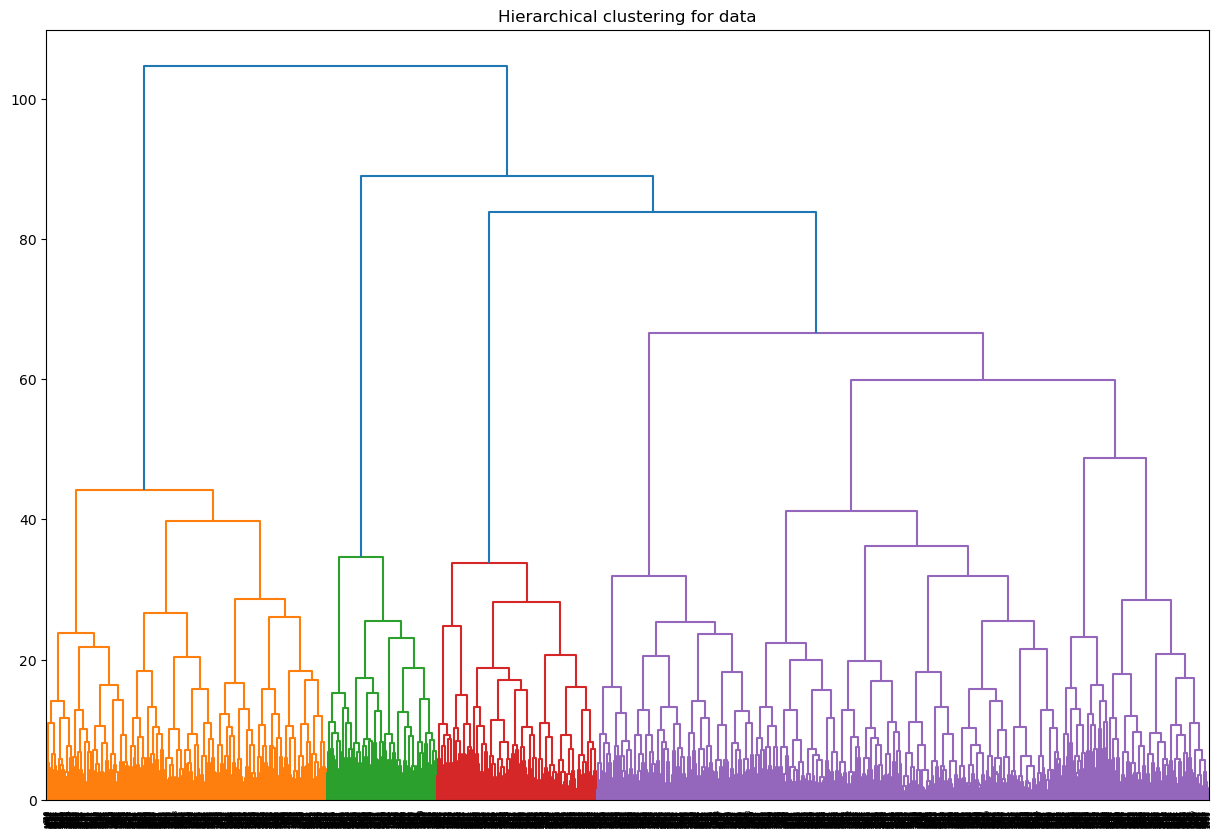

In [25]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for data')
plt.show()

The dendrogram marks with colors different clusters of objects. We can see here four clusters that the model has formed based on the standardized feature matrix.

## Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students.)


K-means groups objects step by step. The algorithm is based on the assumption that the number of clusters (groups) is already known. Let the number of clusters be n=5.

In [26]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)
# store cluster labels in the field of our dataset
data['cluster_km'] = labels
data['cluster_km']

0       3
1       1
2       4
3       1
4       2
       ..
3995    1
3996    4
3997    1
3998    2
3999    3
Name: cluster_km, Length: 4000, dtype: int32

The labels for 5 clusters are assigned and stored in 'cluster_km' column. Let's find how many users belong to each cluster.

In [27]:
data.cluster_km.value_counts()

4    1527
1     915
2     651
0     521
3     386
Name: cluster_km, dtype: int64

In [28]:
clusters =data.cluster_km.value_counts().reset_index()
clusters.columns = ['cluster', 'total']
clusters['%']=clusters.total*100/len(data)
clusters

,cluster,total,%
0,4,1527,38.175
1,1,915,22.875
2,2,651,16.275
3,0,521,13.025
4,3,386,9.650


So, the clusters are not equal: the biggest is cluster 2(almost 28% of data), the smallest is cluster 3 (twice smaller than cl.2).

## Look at the mean feature values for clusters. Does anything catch your eye?


In [29]:
data.groupby(['cluster_km']).mean().T

cluster_km,0,1,2,3,4
gender,0.500960,0.498361,0.505376,0.523316,0.519319
near_location,0.000000,0.951913,0.998464,0.862694,1.000000
partner,0.464491,0.738798,0.774194,0.471503,0.224623
promo_friends,0.078695,0.463388,1.000000,0.305699,0.000000
phone,1.000000,1.000000,1.000000,0.000000,1.000000
contract_period,2.343570,11.547541,3.000000,4.777202,2.056974
group_visits,0.216891,0.542077,0.454685,0.427461,0.379175
age,28.579655,29.948634,29.150538,29.297927,28.918140
avg_additional_charges_total,136.561586,166.092391,141.876021,144.208179,141.863877
month_to_end_contract,2.197697,10.488525,2.804916,4.466321,1.963982


Let's try to reveal the criteria for splitting the data into clusters. What is special about each cluster?
- Cluster 0: 'promo_friends' = 1, 'partner' = 0.82 (max values of all clusters)
- Cluster 1:  'lifetime' = 5.12, 'avg_class_frequency_total'=2.9, 'avg_class_frequency_current_month'= 2.9 (max values of all clusters)
- Cluster 2: 'near_location'= 1, 'partner' = 0.25, 'promo_friends' = 0.02, 'contract_period' = 1.99, 'avg_additional_charges_total' = 131, 'lifetime' =2.42, 'avg_class_frequency_current_month' = 1.04 (min values of all clusters)
- Cluster 3: 'near_location' = 0, 'group_visits' = 0.21 (min values of all clusters)
- Cluster 4: 'contract_period' = 11.9, 'group_visits' = 0.55, avg_additional_charges_total= 165, ' month_to_end_contract' = 10.9 (max values of all clusters).

## Plot distributions of features for the clusters. Do you notice anything?

Let's define function plotting feature distribution for each cluster.

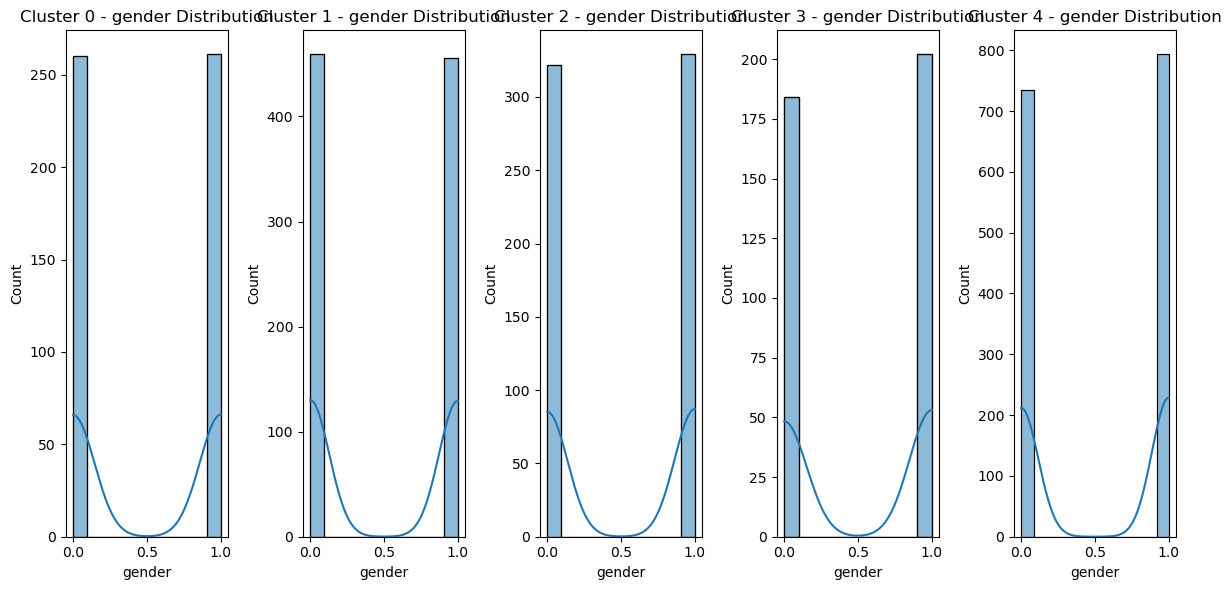

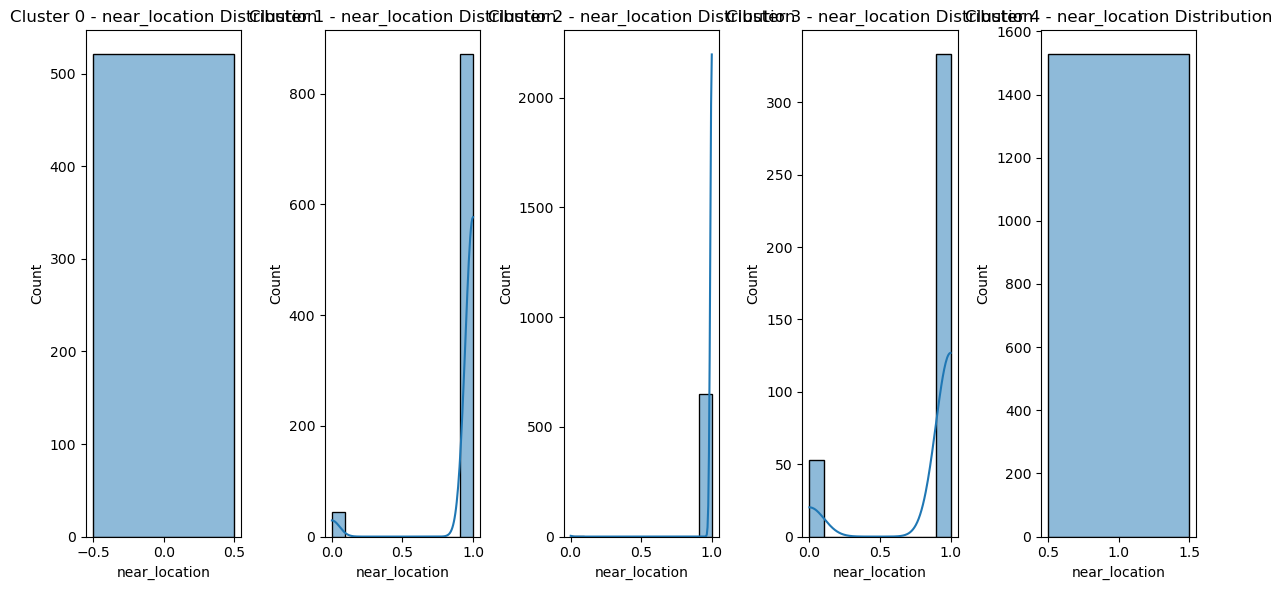

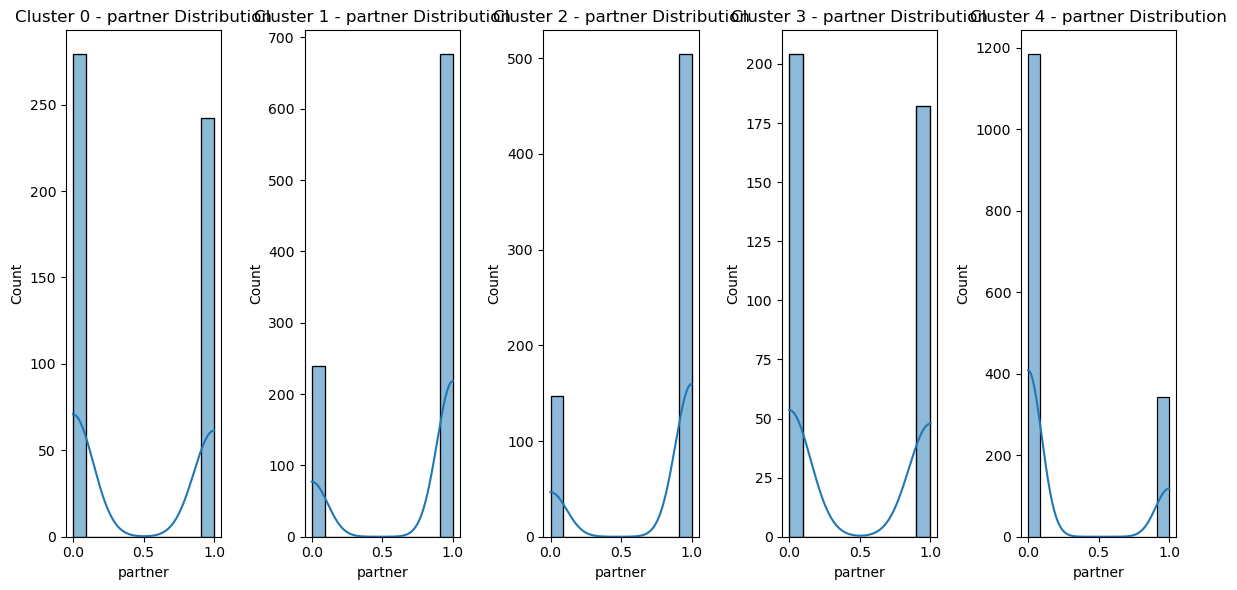

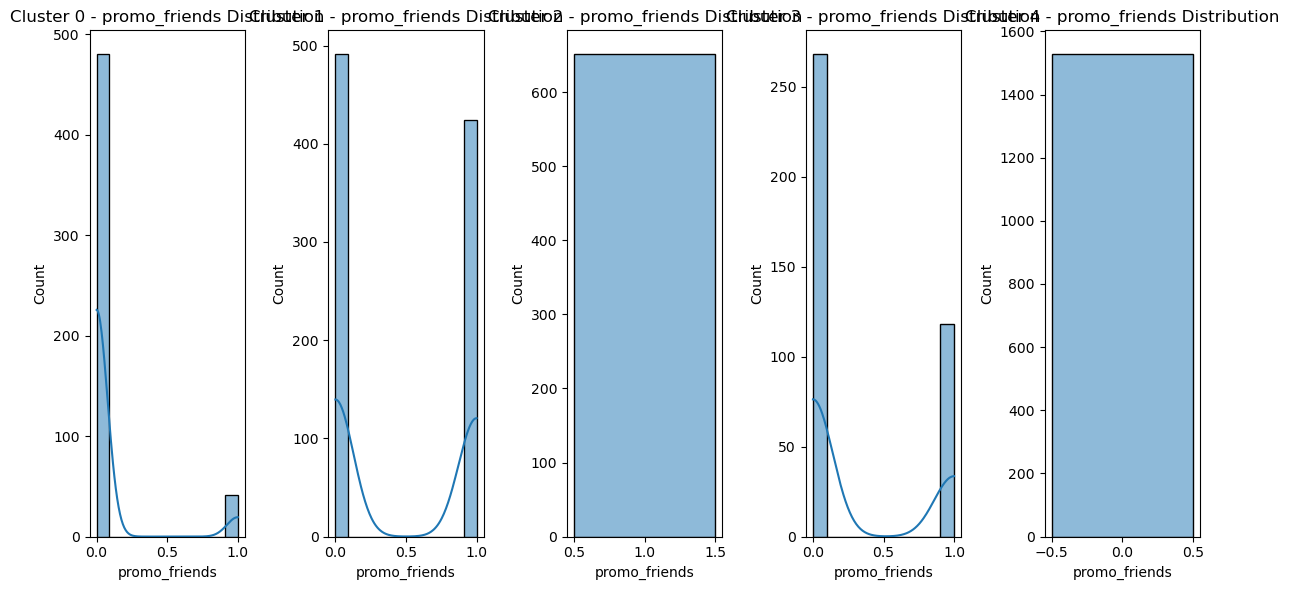

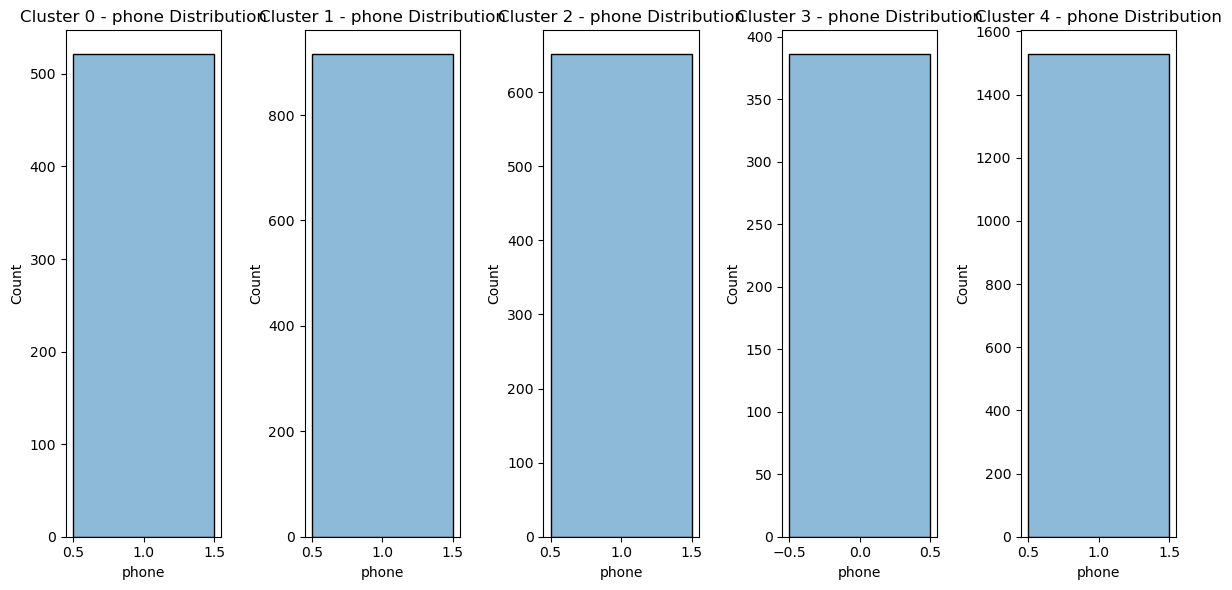

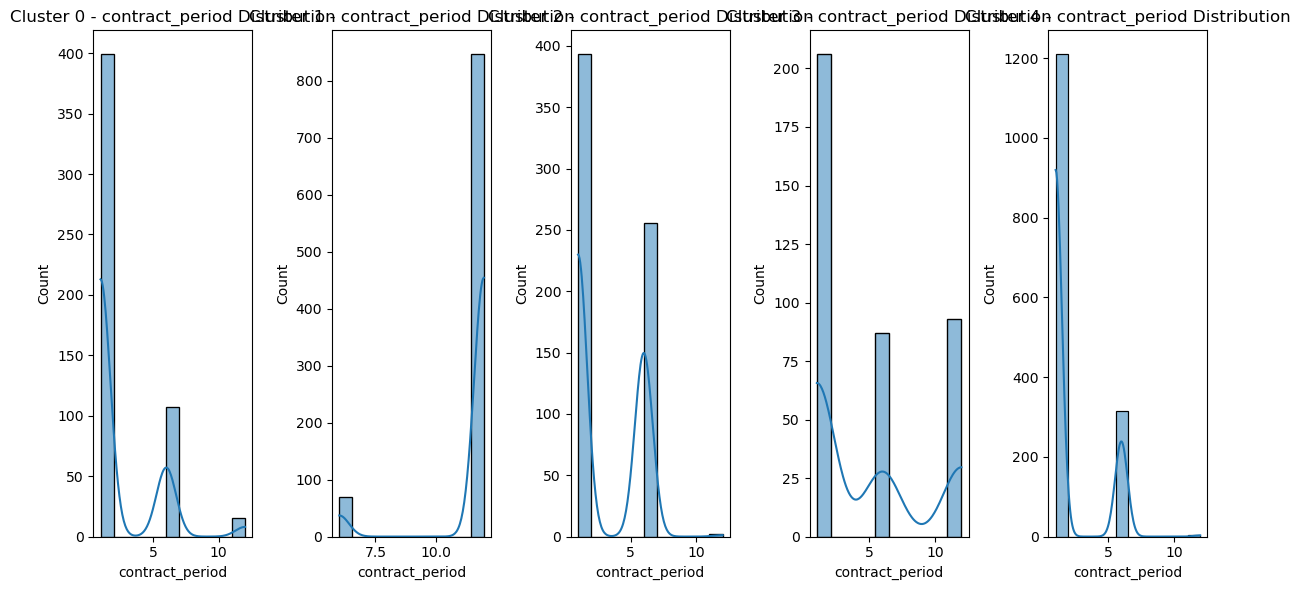

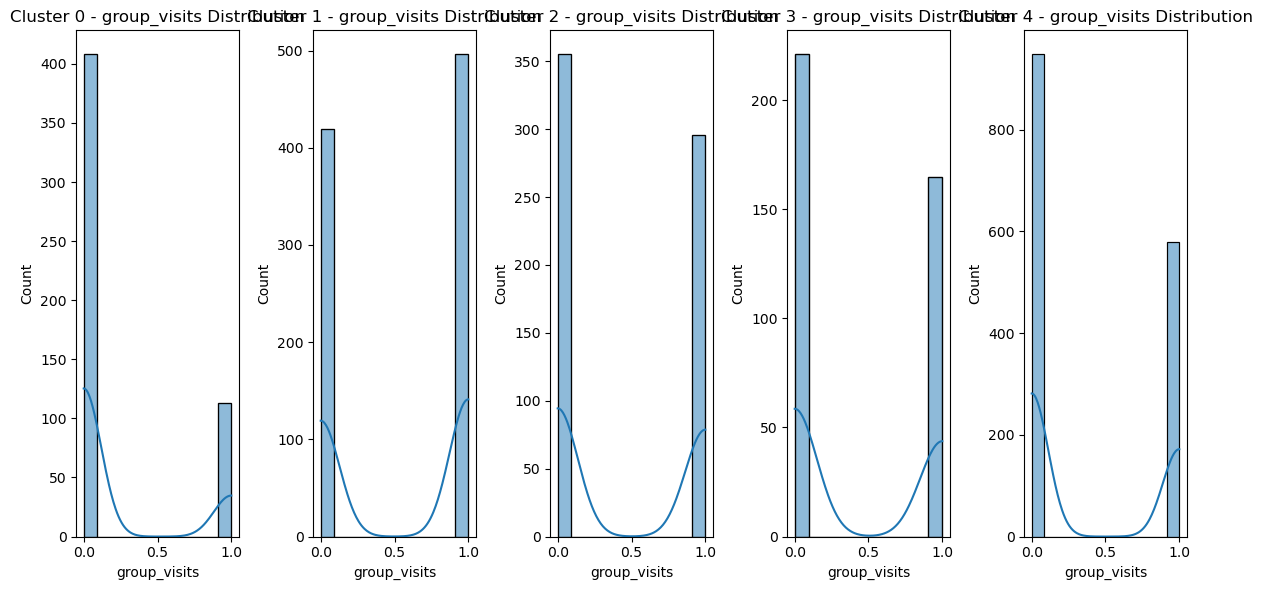

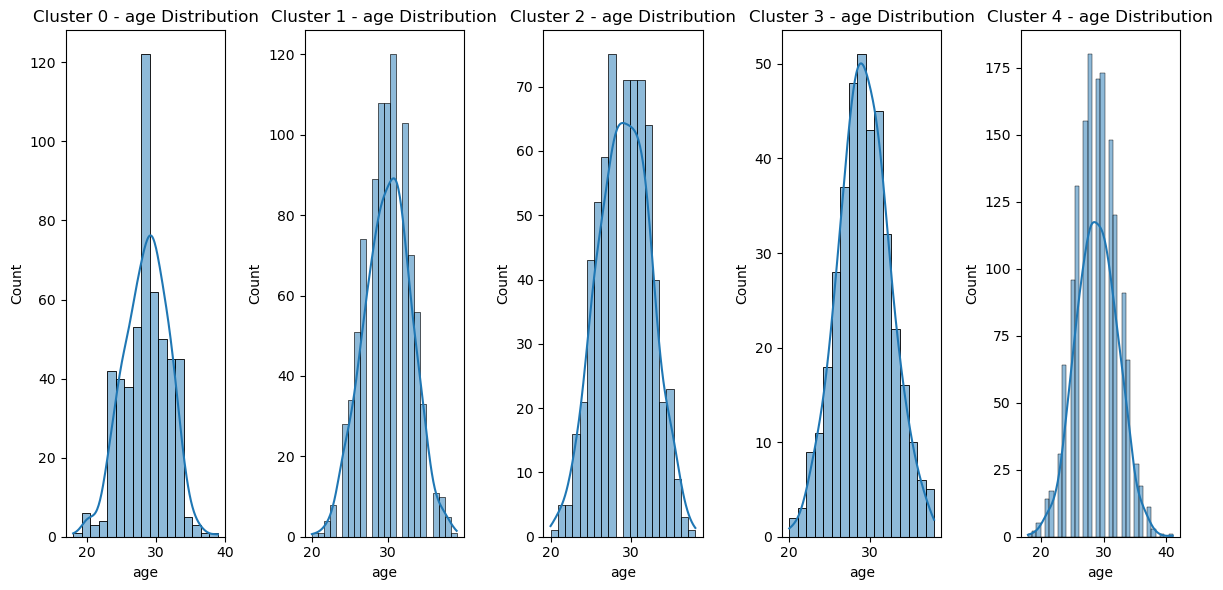

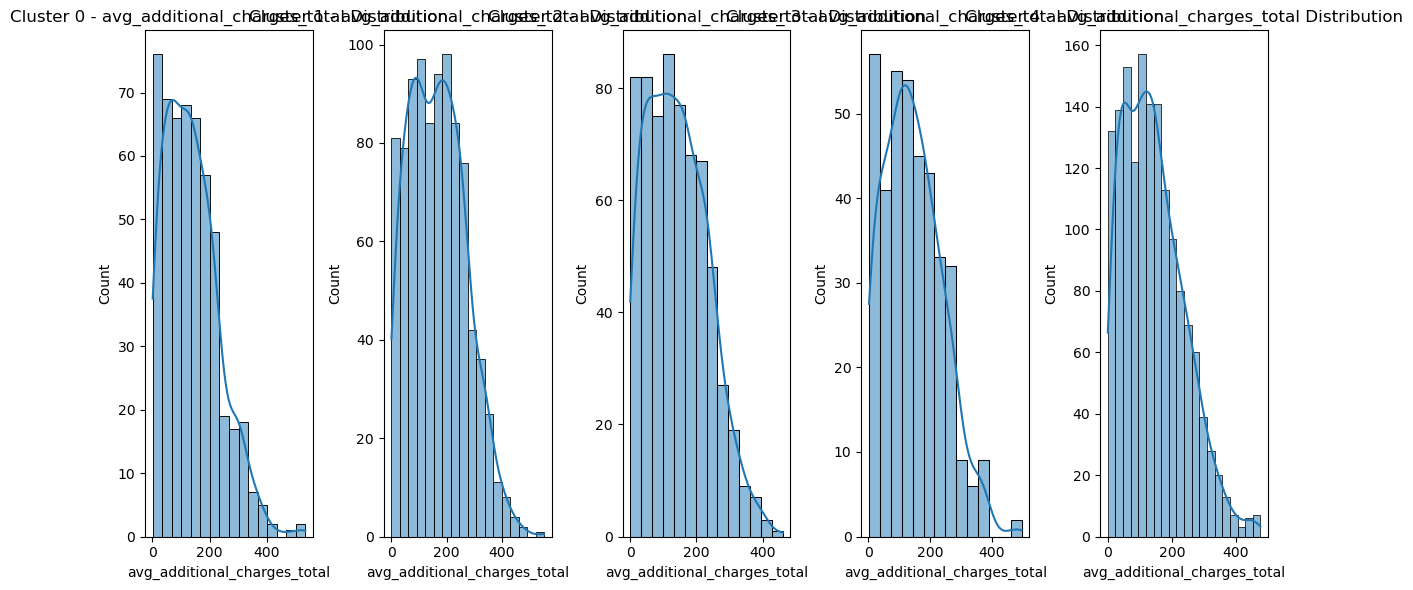

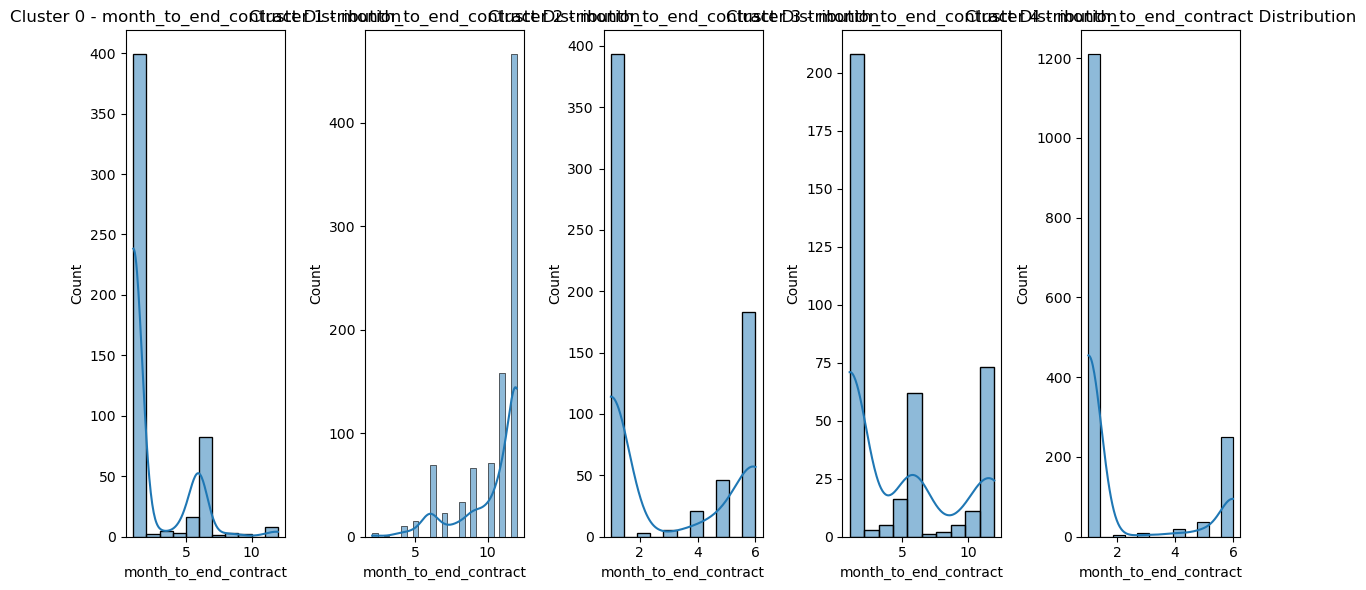

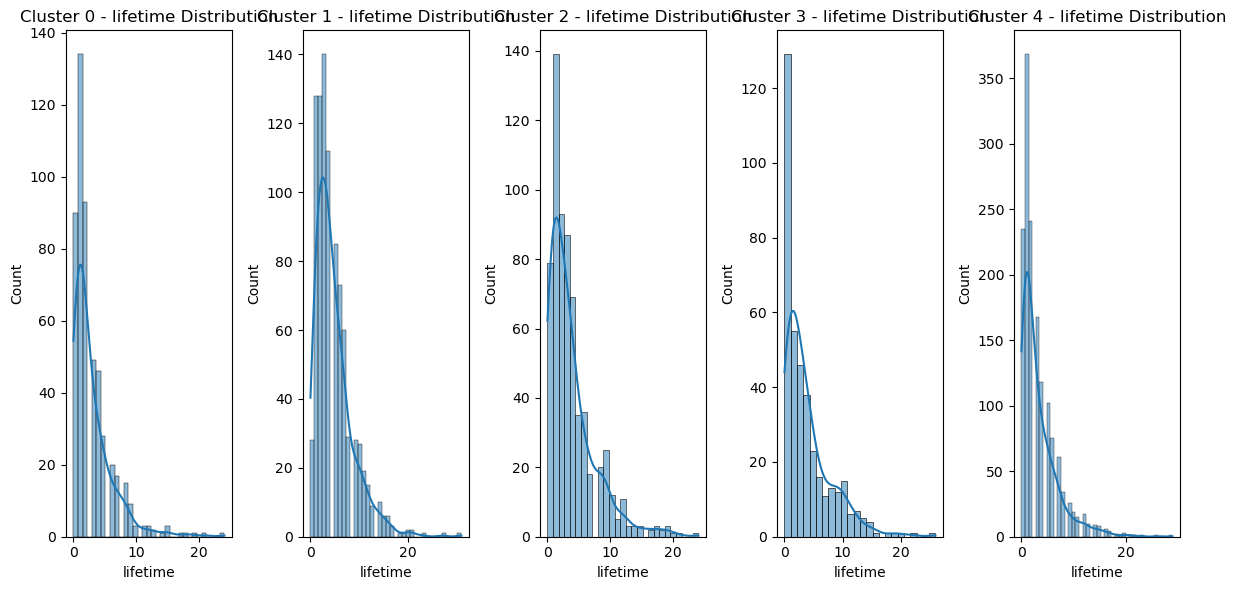

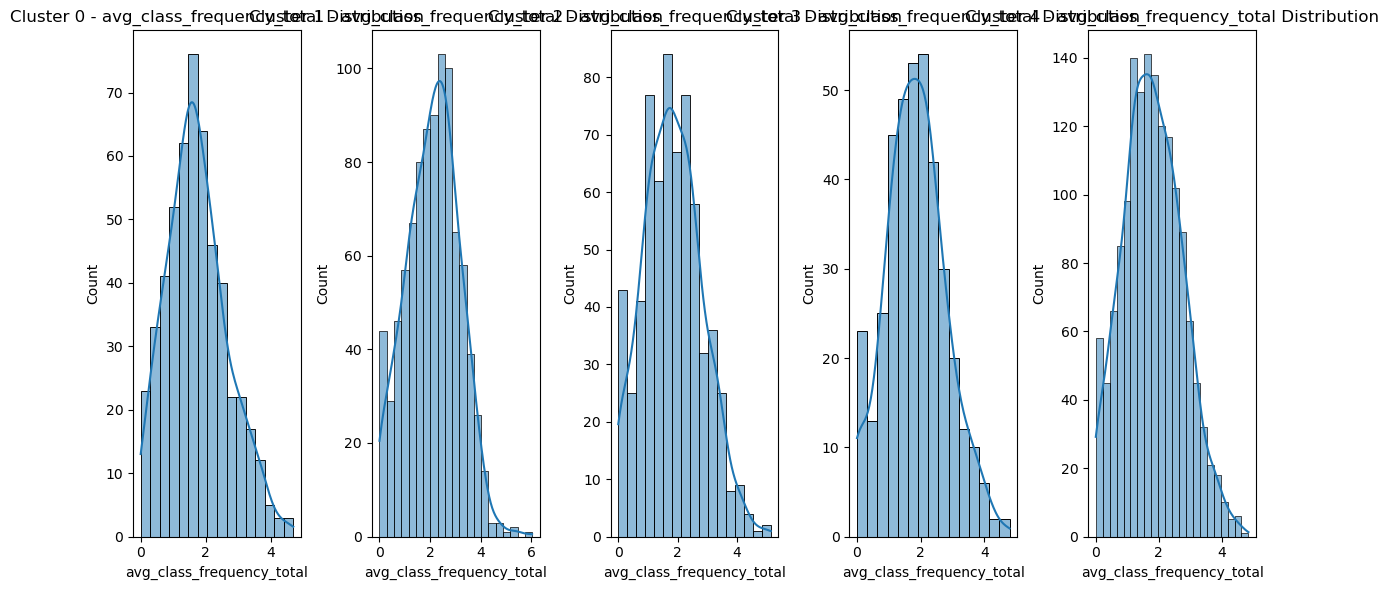

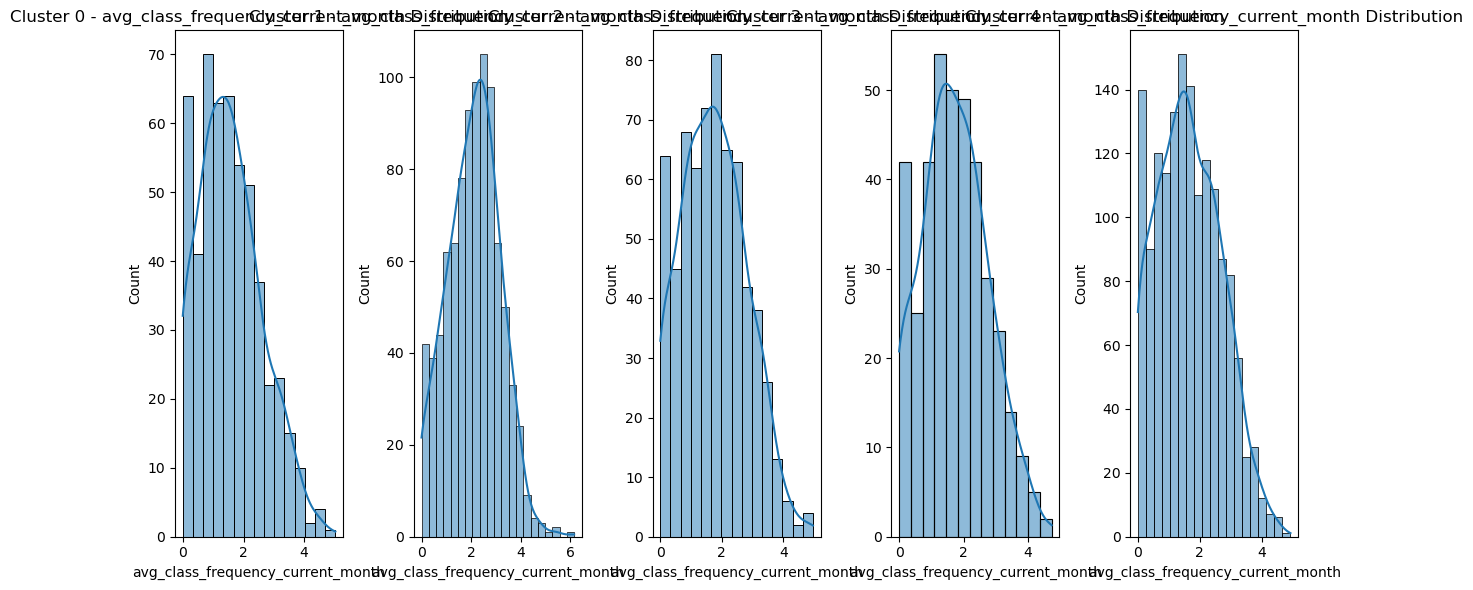

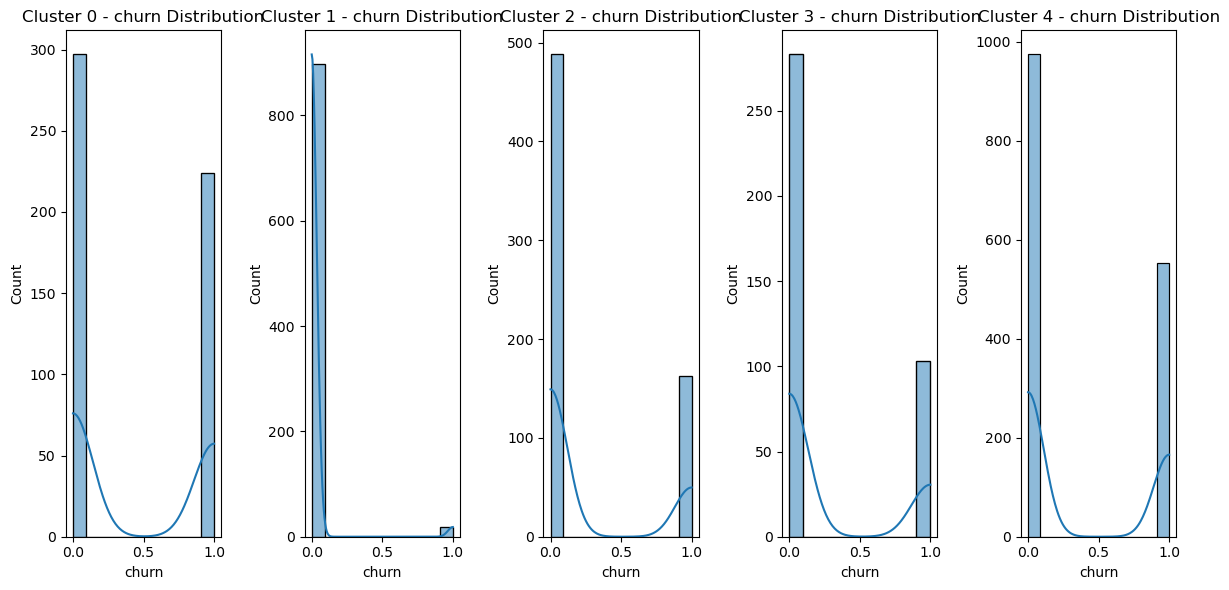

In [30]:
def plot_feature_distributions_by_cluster(df, feature):
    plt.figure(figsize=(12, 6))
    
    # Iterate over clusters
    for cluster in df['cluster_km'].unique():
        plt.subplot(1, df['cluster_km'].nunique(), cluster+1)  
        sns.histplot(data=df[df['cluster_km'] == cluster], x=feature, kde=True)
        plt.title(f'Cluster {cluster} - {feature} Distribution')
    
    plt.tight_layout()
    plt.show()

# Exclude 'cluster_km' column
features = data.columns.drop(['cluster_km']) 
for feature in features:
    plot_feature_distributions_by_cluster(data, feature)



We can compare the feature distribution by clusters and try to find the difference between the clusters. What is special about each cluster on the plot?

- Cluster 0: 'promo_friends' - 100%, max share of 'partner'.
- Cluster 1: 'avg_class_frequency_total' and 'avg_class_frequency_current_month' have normal distibution (regular bell shape) with max mean values, max range of values of all clusters. 
- Cluster 2: 'near_location'= 100% , but min share of users having 'promo_friends',  min values  of 'lifetime', 'age', 'avg_class_frequency_current_month' and 'avg_class_frequency_total'  with max share of users having these small values (min range on x-axis, max range on y-axis). 
- Cluster 3: 'near_location' = 0%, min share of 'group_visits'.
- Cluster 4: max 'contract_period' and 'month_to_end_contract', max share of 'group_visits',  max values of avg_additional_charges_total, max age.

We notice that some features' mean values that we mentioned earlier as special do not look special on the plot, for example cluster 1's 'lifetime' is max of all clusters' mean values, but its distribution on the plot has much in common with cluster 4. The same with 'partner' for cluster 2 - its mean value is min among all clusters, but the distribution on the plot looks very similar to that of cluster 1, so this feature doesn't really look special for cluster 2 on the plot. That's why it's very important to evaluate not only the mean values, but also the pictures of feature distribution.

We also see that such features as  'gender', 'phone' are almost randomly distribured by group and  never used in splitting into clusters. 

## Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

Churn rate is the share of churned users among all users and it is equal to a group's mean value. So we can calculate it with groupby method.

In [31]:
data.groupby('cluster_km').churn.mean()

cluster_km
0    0.429942
1    0.019672
2    0.250384
3    0.266839
4    0.362148
Name: churn, dtype: float64

Churn rate is minimal for cluster 4 (2.2%) and 1 (6.7%). These clusters are the most loyal. Cluster 2 has max churn rate (52.4%) - its users are prone to leaving, cluster 3 is not far behind (45.2%). Cluster 0 with churn rate about 25% is in the middle of loyality range.

# Step 5. Come up with conclusions and basic recommendations on working with customers.


We analyzed Model Fitness gym chain customers profiles, stored in 'data'. There were 4000 customers characterized with 14 parameters. One third of the customers was churned. The mean values and the distributions of all features were analyzed to find the main differences between churned and non-churned users. What is **typical for those who churn**:
- 'near_location': the share of customers living far from location is greater,
- 'promo_friends' and 'group_visits': the share of customers having promo from friends and taking part in group visits is smaller,
- 'partner': the majority of churned users are not employeers of a partner company,
- 'contract_period', 'month_to_end_contract': customers who churned most often have just 1 month contract and 1 month until the contract expires.
- 'lifetime': the time since the customer first came to the gym is on average 5 times smaller for churned customers,
- 'age': the mean and max age for churned customers are smaller (younger people more easily change situation, try to find a better place, are not stable)
- 'avg_class_frequency_total', 'avg_class_frequency_current_month': churned users visit gym less often over the lifetime and over the preceding month,
- 'avg_additional_charges_total': churned users spend less on additional services.

The distribution of 'gender' and 'phone' is very similar for both groups, so these parameters definitely don't influence churn.


A correlation matrix was build to check correlation between parameters. It showed that our target variable **'churn' has significant negative correlation with**:
- 'lifetime' (-0.44),
- 'avg_class_frequency_current_month' (-0.41),
- age(-0.4),
- 'contract_period' (-0.39), 
- 'month_to_end_contract' (-0.38), 
so these features are the most important.

The features 'contract_period' & 'month_to_end_contract' are highly correlated between themselves(0.97), as well as  'avg_class_frequency_current_month' & 'avg_class_frequency_total'(0.95). Features 'promo_friends' & 'partner' have significant positive correlation (0.45), since customers may work for the same partner company and be friends.


Two models for binary classification were built to predict user churn: logistic regression and random forest. **Logistic regression** model gives better results with metrics Accuracy: 0.92, Precision: 0.85, Recall: 0.83 - , so it can be used for predicting user churn.

We also tried to create user clusters. First with **linkage function** and a dendrogram four clusters of users were singled out. Then with **K-means algorithm** the users were devided into 5 clusters. The mean feature values for clusters and distributions of features were analized. What is special about each cluster in comparison with other clusters?
- Cluster 0: all users came with promo from friends, 82% of them are also employees of a partner company(max share of the features), all important features have middle values.
- Cluster 1: maximum mean values for 'lifetime'(5.12), 'avg_class_frequency_total'(2.9), 'avg_class_frequency_current_month'= 2.9.
- Cluster 2: all users live near location, but only 25% of them work for a partner company, 2% came with promo from friends(min share), they on average have min lifetime, contract period, min age,  min class frequency(total and current month) as well as min 'additional_charges_total'.
- Cluster 3: all users live far from location, only 21% of them take part in group visits(min share).
- Cluster 4: on average users have max 'contract_period'(11.9) and  month_to_end_contract'(10.9), max  'avg_additional_charges_total'(165) and max share of 'group_visits'(55%).

Features 'sex' and 'phone' do not differ by clusters.

Clusters can be ordered by **churn rate** from the most loyal to the least loyal:
- cluster 4 (2.2%) - 'Best customers'
- cluster 1 (6.7%) - 'Loyal customers'
- cluster 0 (25%) - 'Promising'
- cluster 3 (45.2%) - 'Needs Attention'
- cluster 2 (52.4%) - 'At Risk'

The first two clusters are the most loyal, the last cluster - cluster 2 is prone to leaving and cluster 3 is not far behind. How to improve the situation? 
We already know which features correlate most with churn and see how features are combined in clusters. 
To prevent churn it's highly recommended:
- to encourage 'Best' and 'Loyal' customers, to reward them;
- to offer membership/loyalty programs for 'Promising' users, to keep them engaged;
- to provide helpful resources on the site, to offer personalised recommendadions for users 'Needs Attention', to develop individual and group programs;
- to provide on-boarding support, start building relationship/revive interest by a specific discount on a specific product, to offer attractive  long-term contracts for users 'At Risk';
- to retain all users it's important to expand the variety of additional goods and services in the location;
- people aged 40+ can also be the target category, most loyal to the company. To attract older users special new programs should be developed, personalised recommendadions offered.